# Threshold optimization 

Jukes Liu

## Import packages and set paths

In [20]:
# import pandas as pd
# import numpy as np
# import os
# import subprocess
# import matplotlib.pyplot as plt
# import cv2
# import matplotlib.image as mpimg
# import matplotlib.pylab as pl
# import numpy.ma as ma
# import datetime
# import math
# import scipy.optimize
# import time
# import random

In [28]:
basepath = '/media/jukes/jukes1/'
sg_path = '/home/jukes/Documents/Sample_glaciers/'

## Read in analysis dates for manual and automated delinations, convert to datetime objs

In [73]:
# #read in manual image dates
# manual_df= pd.read_csv(basepath+'Manual/manual_tpos.csv', sep=',', dtype=str, header=0)
# manual_df = manual_df.dropna()
# manual_df.drop_duplicates(subset=['BoxID','datetimes'])
# print(manual_df.shape)
# manual_df.head()

In [ ]:
# #Read in datetags csv as datetime_df
# automated_df = pd.read_csv(sg_path+'imgdates.csv', sep=',', dtype=str, header=0, names=['Scene', 'datetimes'])
# print(automated_df.shape)
# automated_df.head()

## Find overlaps and select 90% for training, 10% for testing

In [ ]:
# overlap_df = manual_df.merge(automated_df, how='inner', on=['datetimes'])
# overlap_df = overlap_df.drop(['Line_x', 'Line_y'], axis=1)
# overlap_df = overlap_df.drop_duplicates(['BoxID','datetimes'])
# overlap_df = overlap_df.sort_values(by=['BoxID','datetimes'], ascending=True)
# overlap_df.shape

In [ ]:
# dates = []
# for idx, row in overlap_df.iterrows():
#     dateID = str(row['BoxID'])+','+str(row['datetimes']+','+str(row['Scene']))
#     dates.append(dateID)
# # print(date_IDs)

### Select 90% for training

In [ ]:
# N = len(dates); print(N)

# #pick a random sample of dates for training
# train_dates = random.sample(dates, int(N*0.9))
# print(len(train_dates))
# # print(train_dates)

# #grab remaining for testing
# test_dates = []
# for date in dates:
#     if date not in train_dates:
#         test_dates.append(date)
# print(len(test_dates))
# # print(test_dates)

# #Check that they don't overlap, should return empty
# print(len(train_dates)+len(test_dates)); print(set(train_dates).intersection(test_dates))

In [ ]:
# boxes = []; imgdates = []; scenes = []

# for td in train_dates:
#     BoxID, imgdate, scene = td.split(',')
#     boxes.append(BoxID); imgdates.append(imgdate); scenes.append(scene)

# train_df = pd.DataFrame(list(zip(boxes, imgdates, scenes)), columns=['BoxID', 'datetime', 'Scene'])
# train_df.head()

In [ ]:
# #export to csv and text
# train_df.to_csv(basepath+'/Manual/train.csv', sep=',', index=False, header=False)
# train_df.to_csv(basepath+'/Manual/train.txt', sep=' ', index=False, header=False)

### Grab test dates

In [ ]:
# boxes = []; imgdates = []; scenes = []

# for td in test_dates:
#     BoxID, imgdate, scene = td.split(',')
#     boxes.append(BoxID); imgdates.append(imgdate); scenes.append(scene)

# test_df = pd.DataFrame(list(zip(boxes, imgdates, scenes)), columns=['BoxID', 'datetime', 'Scene'])
# # test_df.head()
# #export to csv and text
# test_df.to_csv(basepath+'/Manual/test.csv', sep=',', index=False, header=False)
# test_df.to_csv(basepath+'/Manual/test.txt', sep=' ', index=False, header=False)

## Define objective function

I'm using a modified version of the L1-norm. Imported from the automated_terminus_functions.py script. The objective funciton will be 1/N * (|Xa-Xm|i) where i=3 (for each centerline 50, 25, 75) and N equals the number of delineations generated (the more the better). The goal then is to minimize the objective function.

In [ ]:
# DOA = '2020_01_20'

# def calc_theta(size_thresh, mod_thresh):
#     #Calculate automated tpos
#     #run terminus_pick.tcl using each of the thresholds
#     terminus_pick = '/home/akhalil/src/xsmurf-2.7/main/xsmurf -nodisplay /home/jukes/Documents/Scripts/terminus_pick.tcl '+str(size_thresh)+' '+str(mod_thresh)
#     print(terminus_pick)
#     subprocess.call(terminus_pick, shell=True)
    
#     #pull automated terminus position from the output
#     #grab each output file
#     differences = []
    
#     for file in os.listdir(sg_path):
#         if DOA in file and file.endswith('csv'):
#             if len(file)>28:
#                 print(file)

#                 #read the output file in and calculate terminus position for each image
#                 #pull automated terminus delineations
#                 auto_tpos = 

#                 #pull in manual tpos 
#                 man_tpos = 

#                 diff = abs(auto_tpos - man_tpos)
#                 differences.append(diff)
    
# #     #return objective function = distance between the two
# #     return np.average(differences)

In [ ]:
# def minimize(size_guess, mod_guess):
#     minimum = scipy.optimize.fmin(center_dist, [size_guess, mod_guess], args=(size_guess, mod_guess),full_output=True)
#     xopt = minimum[0][0]
#     funcval = minimum[1]
#     return xopt, funcval

## Run the optimization

    scipy.optimize.fmin(func, x0, args=(), xtol=0.0001, ftol=0.0001, maxiter=None, maxfun=None, full_output=0, disp=1, retall=0, callback=None, initial_simplex=None)[source]

Minimize a function using the downhill simplex algorithm.
This algorithm only uses function values, not derivatives or second derivatives.

Parameters
   - funccallable func(x,*args)
The objective function to be minimized.

   - x0ndarray
Initial guess.

Returns
   - xoptndarray
Parameter that minimizes function.

   - foptfloat
Value of function at minimum: fopt = func(xopt).

   - iterint
Number of iterations performed.

   - funcallsint
Number of function calls made.

   - warnflagint
1 : Maximum number of function evaluations made. 2 : Maximum number of iterations reached.

    -allvecslist
Solution at each iteration.

In [72]:
# os.chdir('/home/jukes/automated-glacier-terminus')
# from automated_terminus_functions import objective_func, calc_theta

In [70]:
# base_size_thresh = 0.7; base_mod_thresh = 0.8; thresh_range = 0.15; step=0.05; interval=1000
# size_guesses = np.arange(0.83, 0.87, 0.02)
# mod_guesses = np.arange(0.78, 0.82, 0.02)

In [71]:
# print(size_guesses); print(mod_guesses);
# n_iter = len(size_guesses)*len(mod_guesses)
# print(n_iter, 'iterations'); print(n_iter*20/60, "max hours to run")

### Hard-coded:

In [69]:
# import subprocess
# import pandas as pd; import numpy as np
# import time

# BOXIDS = ['001', '002', '120', '174', '259']; 
# IDs = " ".join(BOXIDS)

# start_time = time.time() #start recording time

# slist = []; mlist = []; thetalist = []; runtimes = []; #store run results
# for s in size_guesses:
#     for m in mod_guesses:
#         t0 = time.time() # start recording time for each run
        
#         s = float("{0:.3f}".format(s)); m = float("{0:.3f}".format(m)); #make sure precision and format is correct 
#         slist.append(s); mlist.append(m); #append the thresholds to a list
#         print(s, m)
        
#         #run objective function calculation
#         theta = objective_func(IDs, s, m); print(theta); thetalist.append(theta)
        
#         runtime = time.time() - t0; runtimes.append(runtime) # calculate run time and store
#         print("Iteration run time: %s seconds " % runtime) #print run time for each iteration
        
# print("Total time elapsed: --- %s seconds ---" % (time.time() - start_time)) #Print total time elapsed

In [68]:
# optimization_df = pd.DataFrame(list(zip(thetalist, slist, mlist, runtimes)), 
#                                columns=['Theta', 'Size_thresh', 'mod_thresh', 'run_time'])
# optimization_df

In [67]:
# optimization_df[optimization_df['Theta'] == np.min(optimization_df['Theta'])]

In [29]:
# optimization_df.to_csv(sg_path+'optimizationresults_4.csv', sep=',')

# Visualize optimization results

Results from calculating mistfits between automated and manual delineations based on different thresholds used for filtering the WTMM lines. The two thresholds shown here are the size (length) threshold and the mod (gradient value) threshold, which are percentages of the maximum size/mod. So ideally, for 1 parameter (one threshold), the results should look like a parabola. For two 2 parameters like used here, one can visualize it in 3D. 

In [8]:
#plot results
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

#activate interactive widgets for plots:
%matplotlib notebook

path = '/Users/julialiu/Documents/BSU/EGG/'

In [9]:
# df1 = pd.read_csv(sg_path+'optimizationresults_3.csv', sep=',')
# df2 = pd.read_csv(sg_path+'optimizationresults_2.csv', sep=',')
# df3 = pd.read_csv(sg_path+'optimizationresults_1.csv', sep=',')
# df4 = pd.read_csv(sg_path+'optimizationresults_4.csv', sep=',')
# optimization_df = pd.concat([df1, df2, df3, df4])
optimization_df = pd.read_csv(path+'optimizationresults_all4.csv', sep=',')

In [76]:
# optimization_df.to_csv(sg_path+'optimizationresults_all4.csv', sep=',')

In [10]:
x = optimization_df['Size_thresh']
y = optimization_df['mod_thresh']
z = optimization_df['Theta']

<IPython.core.display.Javascript object>


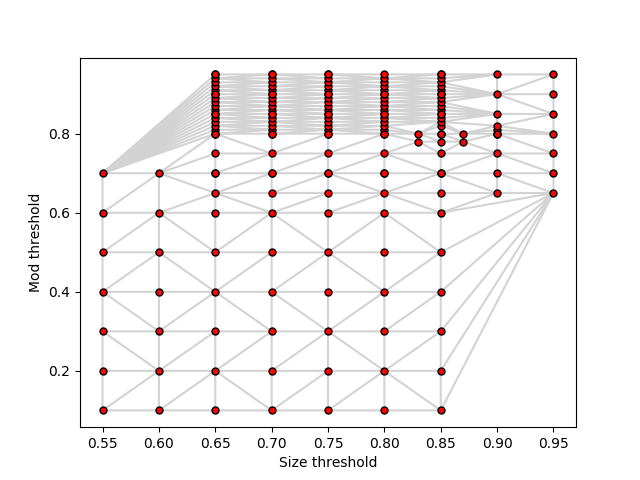

In [6]:
triang = mtri.Triangulation(x, y)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.triplot(triang, c="#D3D3D3", marker='.', markerfacecolor="r", markeredgecolor="black", markersize=10)
ax.set_xlabel('Size threshold')
ax.set_ylabel('Mod threshold')
plt.show()

<IPython.core.display.Javascript object>


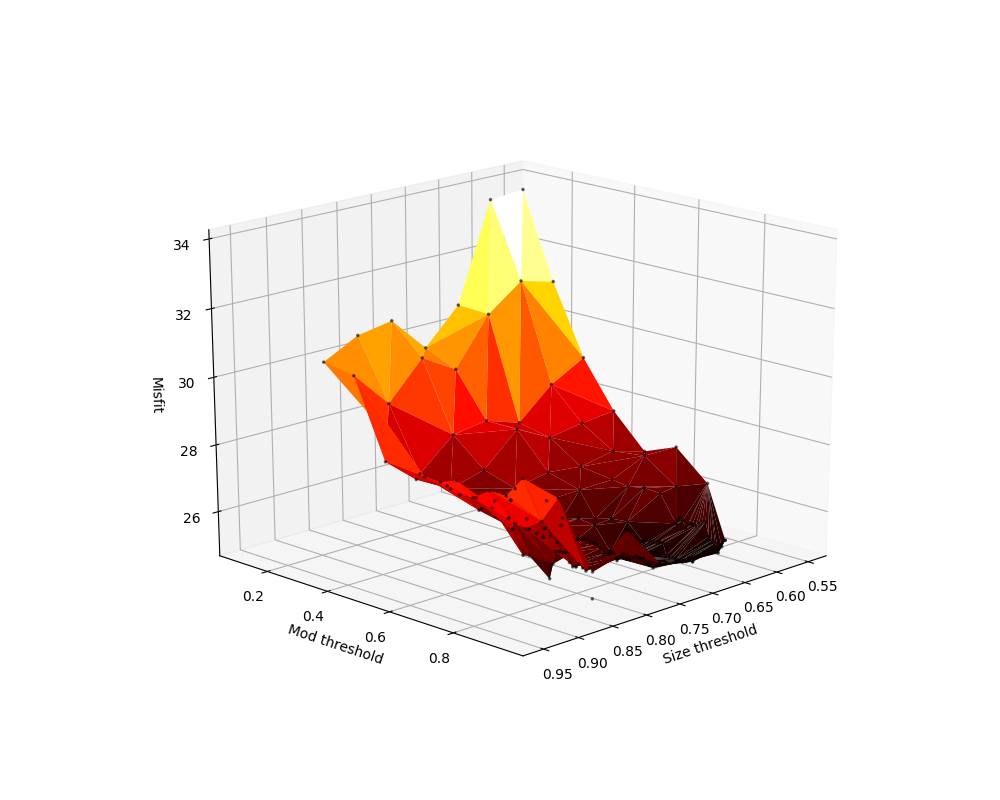

In [7]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_trisurf(triang, z, cmap='hot') # plot the surface over the mesh
ax.scatter(x,y,z, marker='.', s=10, c="k", alpha=0.5) # plot the points
ax.view_init(elev=20, azim=45) # set initial view angle

ax.set_xlabel('Size threshold')
ax.set_ylabel('Mod threshold')
ax.set_zlabel('Misfit')
plt.show()

## Cross-validation